In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
# Loading data
SC = pd.read_csv('C:/Users/User/Desktop/seungchon_2016-2023.csv', encoding='cp949')
JS = pd.read_csv('C:/Users/User/Desktop/juksan_2016-2023.csv', encoding='cp949')

In [254]:
import tensorflow as tf

In [255]:
from tensorflow.keras import layers  #모듈(변수나 함수를 포함)만 불러오기
from sklearn.preprocessing import StandardScaler, MinMaxScaler  #표준 정규화, 최대-최소 정규화
from keras.layers import Dropout

In [256]:
# Load Chl-a data
SC_Chla = pd.read_csv('C:/Users/User/Desktop/Chl-a_seungchon_2016-2023.csv', encoding='cp949')
JS_Chla = pd.read_csv('C:/Users/User/Desktop/Chl-a_juksan_2016-2023.csv', encoding='cp949')

In [257]:
SC_Chla.dropna(inplace=True)
JS_Chla.dropna(inplace=True)

In [258]:
print(SC_Chla.shape)
SC_Chla

(385, 16)


,Date,Chla,y_t+1,Chla_t-12,Chla_t-11,Chla_t-10,Chla_t-9,Chla_t-8,Chla_t-7,Chla_t-6,Chla_t-5,Chla_t-4,Chla_t-3,Chla_t-2,Chla_t-1,Chla_t-0
12,2016.03.28,104.5,82.1,16.9,36.9,38.9,21.2,13.3,14.7,16.0,13.1,44.5,5.7,15.6,59.8,104.5
13,2016.04.04,82.1,107.0,36.9,38.9,21.2,13.3,14.7,16.0,13.1,44.5,5.7,15.6,59.8,104.5,82.1
14,2016.04.11,107.0,36.7,38.9,21.2,13.3,14.7,16.0,13.1,44.5,5.7,15.6,59.8,104.5,82.1,107.0
15,2016.04.18,36.7,31.2,21.2,13.3,14.7,16.0,13.1,44.5,5.7,15.6,59.8,104.5,82.1,107.0,36.7
16,2016.04.25,31.2,39.0,13.3,14.7,16.0,13.1,44.5,5.7,15.6,59.8,104.5,82.1,107.0,36.7,31.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2023.11.13,24.0,24.9,40.7,15.0,12.3,31.3,1.6,2.3,9.0,62.8,69.1,49.6,51.8,27.1,24.0
393,2023.11.20,24.9,31.2,15.0,12.3,31.3,1.6,2.3,9.0,62.8,69.1,49.6,51.8,27.1,24.0,24.9
394,2023.11.27,31.2,46.2,12.3,31.3,1.6,2.3,9.0,62.8,69.1,49.6,51.8,27.1,24.0,24.9,31.2
395,2023.12.04,46.2,70.7,31.3,1.6,2.3,9.0,62.8,69.1,49.6,51.8,27.1,24.0,24.9,31.2,46.2


In [259]:
print(JS_Chla.shape)
JS_Chla

(386, 16)


,Date,Chla,y_t+1,Chla_t-12,Chla_t-11,Chla_t-10,Chla_t-9,Chla_t-8,Chla_t-7,Chla_t-6,Chla_t-5,Chla_t-4,Chla_t-3,Chla_t-2,Chla_t-1,Chla_t-0
12,2016.03.28,87.6,28.5,86.9,114.7,112.9,116.6,32.6,66.8,43.1,38.6,75.1,27.4,15.7,47.4,87.6
13,2016.04.04,28.5,17.8,114.7,112.9,116.6,32.6,66.8,43.1,38.6,75.1,27.4,15.7,47.4,87.6,28.5
14,2016.04.11,17.8,16.6,112.9,116.6,32.6,66.8,43.1,38.6,75.1,27.4,15.7,47.4,87.6,28.5,17.8
15,2016.04.18,16.6,61.5,116.6,32.6,66.8,43.1,38.6,75.1,27.4,15.7,47.4,87.6,28.5,17.8,16.6
16,2016.04.25,61.5,32.9,32.6,66.8,43.1,38.6,75.1,27.4,15.7,47.4,87.6,28.5,17.8,16.6,61.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,2023.11.13,16.1,13.7,24.1,17.2,38.1,17.1,2.7,16.6,7.0,21.9,25.3,24.1,28.8,21.0,16.1
394,2023.11.20,13.7,12.9,17.2,38.1,17.1,2.7,16.6,7.0,21.9,25.3,24.1,28.8,21.0,16.1,13.7
395,2023.11.27,12.9,8.3,38.1,17.1,2.7,16.6,7.0,21.9,25.3,24.1,28.8,21.0,16.1,13.7,12.9
396,2023.12.04,8.3,14.3,17.1,2.7,16.6,7.0,21.9,25.3,24.1,28.8,21.0,16.1,13.7,12.9,8.3


In [260]:
# SC (train vs test)
train_SC = SC_Chla[SC_Chla.index < 353]
test_SC = SC_Chla[SC_Chla.index >= 353]

In [261]:
train_SC

,Date,Chla,y_t+1,Chla_t-12,Chla_t-11,Chla_t-10,Chla_t-9,Chla_t-8,Chla_t-7,Chla_t-6,Chla_t-5,Chla_t-4,Chla_t-3,Chla_t-2,Chla_t-1,Chla_t-0
12,2016.03.28,104.5,82.1,16.9,36.9,38.9,21.2,13.3,14.7,16.0,13.1,44.5,5.7,15.6,59.8,104.5
13,2016.04.04,82.1,107.0,36.9,38.9,21.2,13.3,14.7,16.0,13.1,44.5,5.7,15.6,59.8,104.5,82.1
14,2016.04.11,107.0,36.7,38.9,21.2,13.3,14.7,16.0,13.1,44.5,5.7,15.6,59.8,104.5,82.1,107.0
15,2016.04.18,36.7,31.2,21.2,13.3,14.7,16.0,13.1,44.5,5.7,15.6,59.8,104.5,82.1,107.0,36.7
16,2016.04.25,31.2,39.0,13.3,14.7,16.0,13.1,44.5,5.7,15.6,59.8,104.5,82.1,107.0,36.7,31.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,2022.11.14,18.5,17.2,26.4,80.7,48.7,43.7,48.8,56.8,17.6,31.7,61.3,60.1,28.4,22.3,18.5
349,2022.11.21,17.2,17.1,80.7,48.7,43.7,48.8,56.8,17.6,31.7,61.3,60.1,28.4,22.3,18.5,17.2
350,2022.11.28,17.1,11.4,48.7,43.7,48.8,56.8,17.6,31.7,61.3,60.1,28.4,22.3,18.5,17.2,17.1
351,2022.12.05,11.4,20.9,43.7,48.8,56.8,17.6,31.7,61.3,60.1,28.4,22.3,18.5,17.2,17.1,11.4


In [262]:
test_SC

,Date,Chla,y_t+1,Chla_t-12,Chla_t-11,Chla_t-10,Chla_t-9,Chla_t-8,Chla_t-7,Chla_t-6,Chla_t-5,Chla_t-4,Chla_t-3,Chla_t-2,Chla_t-1,Chla_t-0
353,2023.01.09,48.7,62.5,56.8,17.6,31.7,61.3,60.1,28.4,22.3,18.5,17.2,17.1,11.4,20.9,48.7
354,2023.01.16,62.5,47.9,17.6,31.7,61.3,60.1,28.4,22.3,18.5,17.2,17.1,11.4,20.9,48.7,62.5
355,2023.01.30,47.9,55.5,31.7,61.3,60.1,28.4,22.3,18.5,17.2,17.1,11.4,20.9,48.7,62.5,47.9
356,2023.02.06,55.5,53.8,61.3,60.1,28.4,22.3,18.5,17.2,17.1,11.4,20.9,48.7,62.5,47.9,55.5
357,2023.02.13,53.8,59.0,60.1,28.4,22.3,18.5,17.2,17.1,11.4,20.9,48.7,62.5,47.9,55.5,53.8
358,2023.02.20,59.0,51.6,28.4,22.3,18.5,17.2,17.1,11.4,20.9,48.7,62.5,47.9,55.5,53.8,59.0
359,2023.02.27,51.6,68.6,22.3,18.5,17.2,17.1,11.4,20.9,48.7,62.5,47.9,55.5,53.8,59.0,51.6
360,2023.04.03,68.6,28.6,18.5,17.2,17.1,11.4,20.9,48.7,62.5,47.9,55.5,53.8,59.0,51.6,68.6
361,2023.04.10,28.6,67.6,17.2,17.1,11.4,20.9,48.7,62.5,47.9,55.5,53.8,59.0,51.6,68.6,28.6
362,2023.04.17,67.6,42.5,17.1,11.4,20.9,48.7,62.5,47.9,55.5,53.8,59.0,51.6,68.6,28.6,67.6


In [263]:
# JS (train vs test)
train_JS = JS_Chla[JS_Chla.index < 354]
test_JS = JS_Chla[JS_Chla.index >= 354]

In [264]:
train_JS

,Date,Chla,y_t+1,Chla_t-12,Chla_t-11,Chla_t-10,Chla_t-9,Chla_t-8,Chla_t-7,Chla_t-6,Chla_t-5,Chla_t-4,Chla_t-3,Chla_t-2,Chla_t-1,Chla_t-0
12,2016.03.28,87.6,28.5,86.9,114.7,112.9,116.6,32.6,66.8,43.1,38.6,75.1,27.4,15.7,47.4,87.6
13,2016.04.04,28.5,17.8,114.7,112.9,116.6,32.6,66.8,43.1,38.6,75.1,27.4,15.7,47.4,87.6,28.5
14,2016.04.11,17.8,16.6,112.9,116.6,32.6,66.8,43.1,38.6,75.1,27.4,15.7,47.4,87.6,28.5,17.8
15,2016.04.18,16.6,61.5,116.6,32.6,66.8,43.1,38.6,75.1,27.4,15.7,47.4,87.6,28.5,17.8,16.6
16,2016.04.25,61.5,32.9,32.6,66.8,43.1,38.6,75.1,27.4,15.7,47.4,87.6,28.5,17.8,16.6,61.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,2022.11.14,20.8,15.5,53.0,43.8,34.7,29.5,47.9,43.7,40.4,40.9,33.1,19.6,22.6,13.4,20.8
350,2022.11.21,15.5,17.9,43.8,34.7,29.5,47.9,43.7,40.4,40.9,33.1,19.6,22.6,13.4,20.8,15.5
351,2022.11.28,17.9,23.9,34.7,29.5,47.9,43.7,40.4,40.9,33.1,19.6,22.6,13.4,20.8,15.5,17.9
352,2022.12.05,23.9,38.3,29.5,47.9,43.7,40.4,40.9,33.1,19.6,22.6,13.4,20.8,15.5,17.9,23.9


In [265]:
test_JS

,Date,Chla,y_t+1,Chla_t-12,Chla_t-11,Chla_t-10,Chla_t-9,Chla_t-8,Chla_t-7,Chla_t-6,Chla_t-5,Chla_t-4,Chla_t-3,Chla_t-2,Chla_t-1,Chla_t-0
354,2023.01.09,47.0,37.4,43.7,40.4,40.9,33.1,19.6,22.6,13.4,20.8,15.5,17.9,23.9,38.3,47.0
355,2023.01.16,37.4,53.2,40.4,40.9,33.1,19.6,22.6,13.4,20.8,15.5,17.9,23.9,38.3,47.0,37.4
356,2023.01.30,53.2,42.4,40.9,33.1,19.6,22.6,13.4,20.8,15.5,17.9,23.9,38.3,47.0,37.4,53.2
357,2023.02.06,42.4,26.7,33.1,19.6,22.6,13.4,20.8,15.5,17.9,23.9,38.3,47.0,37.4,53.2,42.4
358,2023.02.13,26.7,18.0,19.6,22.6,13.4,20.8,15.5,17.9,23.9,38.3,47.0,37.4,53.2,42.4,26.7
359,2023.02.20,18.0,11.3,22.6,13.4,20.8,15.5,17.9,23.9,38.3,47.0,37.4,53.2,42.4,26.7,18.0
360,2023.02.27,11.3,115.7,13.4,20.8,15.5,17.9,23.9,38.3,47.0,37.4,53.2,42.4,26.7,18.0,11.3
361,2023.04.03,115.7,29.1,20.8,15.5,17.9,23.9,38.3,47.0,37.4,53.2,42.4,26.7,18.0,11.3,115.7
362,2023.04.10,29.1,34.2,15.5,17.9,23.9,38.3,47.0,37.4,53.2,42.4,26.7,18.0,11.3,115.7,29.1
363,2023.04.17,34.2,34.8,17.9,23.9,38.3,47.0,37.4,53.2,42.4,26.7,18.0,11.3,115.7,29.1,34.2


In [269]:
# train vs test
X_train_SC = train_SC.loc[:, 'Chla_t-12':'Chla_t-0']
y_train_SC = train_SC['y_t+1']

X_test_SC = test_SC.loc[:, 'Chla_t-12':'Chla_t-0']
y_test_SC = test_SC['y_t+1']

X_train_JS = train_JS.loc[:, 'Chla_t-12':'Chla_t-0']
y_train_JS = train_JS['y_t+1']

X_test_JS = test_JS.loc[:, 'Chla_t-12':'Chla_t-0']
y_test_JS = test_JS['y_t+1']

print(X_train_SC.shape, y_train_SC.shape)
print(X_test_SC.shape, y_test_SC.shape)
print(X_train_JS.shape, y_train_JS.shape)
print(X_test_JS.shape, y_test_JS.shape)

(341, 13) (341,)
(44, 13) (44,)
(342, 13) (342,)
(44, 13) (44,)


In [270]:
# 이 셀을 두 번 실행시키면 values가 없다고 뜬다. 그럴 때는 위부터 다시 실행하고 오면 된다.
X_train_SC = X_train_SC.values.reshape(341,13,1)
X_test_SC = X_test_SC.values.reshape(44,13,1)
X_train_JS = X_train_JS.values.reshape(342,13,1)
X_test_JS = X_test_JS.values.reshape(44,13,1)

In [271]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

# RNN

In [298]:
# RNN model (SC)
model = Sequential()
# time_steps는 과거 5개의 데이터를 토대로 미래를 맞춘다.
# features는 Chl-a 하나만 예측하므로 1개이다.
model.add(SimpleRNN(1024, input_shape=(13, 1), return_sequences=False))
model.add(layers.Activation('tanh'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='Adam', metrics=["mean_squared_error","mean_absolute_error"])

history = model.fit(X_train_SC, y_train_SC, validation_split=0.2, epochs=100, verbose=2)

Epoch 1/100
9/9 - 1s - loss: 3502.1602 - mean_squared_error: 3502.1602 - mean_absolute_error: 43.2470 - val_loss: 1967.4502 - val_mean_squared_error: 1967.4502 - val_mean_absolute_error: 33.3159 - 752ms/epoch - 84ms/step
Epoch 2/100
9/9 - 0s - loss: 2380.9595 - mean_squared_error: 2380.9595 - mean_absolute_error: 33.8268 - val_loss: 1601.1440 - val_mean_squared_error: 1601.1440 - val_mean_absolute_error: 30.7428 - 289ms/epoch - 32ms/step
Epoch 3/100
9/9 - 0s - loss: 2050.1985 - mean_squared_error: 2050.1985 - mean_absolute_error: 31.3597 - val_loss: 1418.6558 - val_mean_squared_error: 1418.6558 - val_mean_absolute_error: 29.5139 - 288ms/epoch - 32ms/step
Epoch 4/100
9/9 - 0s - loss: 1863.8553 - mean_squared_error: 1863.8553 - mean_absolute_error: 30.0727 - val_loss: 1299.0615 - val_mean_squared_error: 1299.0615 - val_mean_absolute_error: 28.5747 - 295ms/epoch - 33ms/step
Epoch 5/100
9/9 - 0s - loss: 1760.1648 - mean_squared_error: 1760.1648 - mean_absolute_error: 29.5745 - val_loss: 12

Epoch 38/100
9/9 - 0s - loss: 1277.8562 - mean_squared_error: 1277.8562 - mean_absolute_error: 26.3746 - val_loss: 1203.6599 - val_mean_squared_error: 1203.6599 - val_mean_absolute_error: 27.8977 - 286ms/epoch - 32ms/step
Epoch 39/100
9/9 - 0s - loss: 1272.7273 - mean_squared_error: 1272.7273 - mean_absolute_error: 26.2037 - val_loss: 1215.3339 - val_mean_squared_error: 1215.3339 - val_mean_absolute_error: 27.9343 - 284ms/epoch - 32ms/step
Epoch 40/100
9/9 - 0s - loss: 1252.7988 - mean_squared_error: 1252.7988 - mean_absolute_error: 26.1663 - val_loss: 1242.2690 - val_mean_squared_error: 1242.2690 - val_mean_absolute_error: 28.3643 - 286ms/epoch - 32ms/step
Epoch 41/100
9/9 - 0s - loss: 1250.2146 - mean_squared_error: 1250.2146 - mean_absolute_error: 25.8985 - val_loss: 1223.0333 - val_mean_squared_error: 1223.0333 - val_mean_absolute_error: 28.0474 - 289ms/epoch - 32ms/step
Epoch 42/100
9/9 - 0s - loss: 1246.0077 - mean_squared_error: 1246.0077 - mean_absolute_error: 26.0395 - val_los

Epoch 75/100
9/9 - 0s - loss: 1168.4025 - mean_squared_error: 1168.4025 - mean_absolute_error: 25.9224 - val_loss: 1276.0160 - val_mean_squared_error: 1276.0160 - val_mean_absolute_error: 28.6372 - 286ms/epoch - 32ms/step
Epoch 76/100
9/9 - 0s - loss: 1165.1436 - mean_squared_error: 1165.1436 - mean_absolute_error: 25.4894 - val_loss: 1304.5883 - val_mean_squared_error: 1304.5883 - val_mean_absolute_error: 28.6701 - 283ms/epoch - 31ms/step
Epoch 77/100
9/9 - 0s - loss: 1148.4984 - mean_squared_error: 1148.4984 - mean_absolute_error: 25.2261 - val_loss: 1309.7659 - val_mean_squared_error: 1309.7659 - val_mean_absolute_error: 28.8782 - 285ms/epoch - 32ms/step
Epoch 78/100
9/9 - 0s - loss: 1150.8074 - mean_squared_error: 1150.8074 - mean_absolute_error: 25.2266 - val_loss: 1335.7333 - val_mean_squared_error: 1335.7333 - val_mean_absolute_error: 28.8777 - 290ms/epoch - 32ms/step
Epoch 79/100
9/9 - 0s - loss: 1146.6653 - mean_squared_error: 1146.6653 - mean_absolute_error: 25.3405 - val_los

In [299]:
model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_39 (SimpleRNN)   (None, 1024)              1050624   
                                                                 
 activation_29 (Activation)  (None, 1024)              0         
                                                                 
 dense_47 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 1051649 (4.01 MB)
Trainable params: 1051649 (4.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [300]:
scores = model.evaluate(X_test_SC, y_test_SC)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 7ms/step - loss: 608.6154 - mean_squared_error: 608.6154 - mean_absolute_error: 19.9910
test_loss:  608.6154174804688
test_mae:  608.6154174804688


In [301]:
SC_test_y_pred_RNN = model.predict(X_test_SC)
SC_test_y_pred_RNN

2/2 [==============================] - 0s 5ms/step


array([[54.811134],
       [61.010452],
       [48.47565 ],
       [47.913624],
       [52.07488 ],
       [58.530884],
       [50.447926],
       [54.61185 ],
       [43.730846],
       [49.623028],
       [49.013157],
       [62.762325],
       [38.800068],
       [41.97498 ],
       [45.847916],
       [37.849216],
       [49.924995],
       [49.696938],
       [40.20286 ],
       [33.850346],
       [33.312733],
       [34.30757 ],
       [34.718586],
       [34.09151 ],
       [47.3084  ],
       [61.837032],
       [53.32094 ],
       [46.234993],
       [37.117615],
       [34.907085],
       [48.906876],
       [38.2442  ],
       [32.46473 ],
       [35.011456],
       [68.02383 ],
       [63.846737],
       [48.333218],
       [46.634018],
       [42.645527],
       [39.843178],
       [41.355564],
       [44.553535],
       [52.14635 ],
       [62.227467]], dtype=float32)

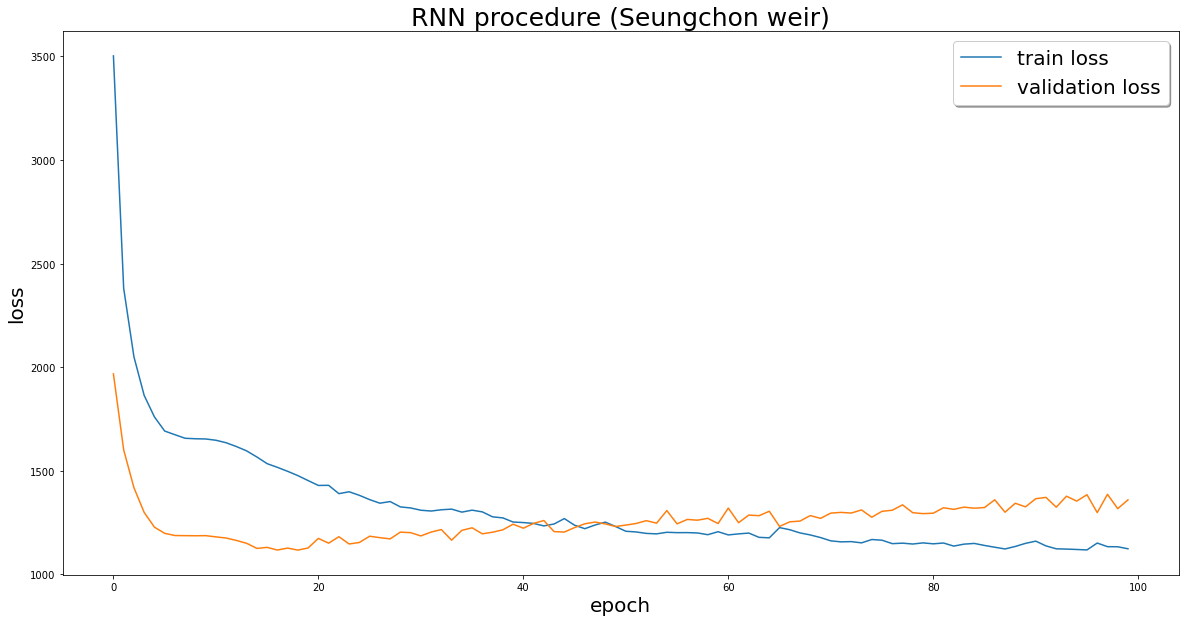

In [302]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), history.history['loss'], label='train loss')
plt.plot(range(100), history.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('RNN procedure (Seungchon weir)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('RNN SC_python.png')

In [313]:
# RNN model (JS)
model = Sequential()
# time_steps는 과거 5개의 데이터를 토대로 미래를 맞춘다.
# features는 Chl-a 하나만 예측하므로 1개이다.
model.add(SimpleRNN(1024, input_shape=(13, 1), return_sequences=False))
model.add(layers.Activation('tanh'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='Adam', metrics=["mean_squared_error","mean_absolute_error"])

history = model.fit(X_train_JS, y_train_JS, validation_split=0.2, epochs=100, verbose=2)

Epoch 1/100
9/9 - 1s - loss: 3543.1560 - mean_squared_error: 3543.1560 - mean_absolute_error: 41.7630 - val_loss: 1230.5480 - val_mean_squared_error: 1230.5480 - val_mean_absolute_error: 24.3749 - 752ms/epoch - 84ms/step
Epoch 2/100
9/9 - 0s - loss: 2507.3022 - mean_squared_error: 2507.3022 - mean_absolute_error: 33.0288 - val_loss: 1002.7431 - val_mean_squared_error: 1002.7431 - val_mean_absolute_error: 21.8883 - 288ms/epoch - 32ms/step
Epoch 3/100
9/9 - 0s - loss: 2198.3149 - mean_squared_error: 2198.3149 - mean_absolute_error: 31.1279 - val_loss: 896.1215 - val_mean_squared_error: 896.1215 - val_mean_absolute_error: 21.3275 - 285ms/epoch - 32ms/step
Epoch 4/100
9/9 - 0s - loss: 2036.2537 - mean_squared_error: 2036.2537 - mean_absolute_error: 30.3825 - val_loss: 846.8763 - val_mean_squared_error: 846.8763 - val_mean_absolute_error: 21.5538 - 287ms/epoch - 32ms/step
Epoch 5/100
9/9 - 0s - loss: 1944.4576 - mean_squared_error: 1944.4576 - mean_absolute_error: 30.4823 - val_loss: 839.46

Epoch 39/100
9/9 - 0s - loss: 1264.9729 - mean_squared_error: 1264.9729 - mean_absolute_error: 26.5925 - val_loss: 755.2469 - val_mean_squared_error: 755.2469 - val_mean_absolute_error: 20.8573 - 282ms/epoch - 31ms/step
Epoch 40/100
9/9 - 0s - loss: 1243.8604 - mean_squared_error: 1243.8604 - mean_absolute_error: 26.3238 - val_loss: 755.3371 - val_mean_squared_error: 755.3371 - val_mean_absolute_error: 20.5281 - 283ms/epoch - 31ms/step
Epoch 41/100
9/9 - 0s - loss: 1241.5863 - mean_squared_error: 1241.5863 - mean_absolute_error: 25.9180 - val_loss: 785.5229 - val_mean_squared_error: 785.5229 - val_mean_absolute_error: 21.2458 - 284ms/epoch - 32ms/step
Epoch 42/100
9/9 - 0s - loss: 1241.4722 - mean_squared_error: 1241.4722 - mean_absolute_error: 26.5348 - val_loss: 771.1353 - val_mean_squared_error: 771.1353 - val_mean_absolute_error: 20.3566 - 282ms/epoch - 31ms/step
Epoch 43/100
9/9 - 0s - loss: 1236.2788 - mean_squared_error: 1236.2788 - mean_absolute_error: 25.8699 - val_loss: 784.9

Epoch 77/100
9/9 - 0s - loss: 1075.2162 - mean_squared_error: 1075.2162 - mean_absolute_error: 25.0821 - val_loss: 797.1583 - val_mean_squared_error: 797.1583 - val_mean_absolute_error: 21.0017 - 286ms/epoch - 32ms/step
Epoch 78/100
9/9 - 0s - loss: 1050.3727 - mean_squared_error: 1050.3727 - mean_absolute_error: 24.6853 - val_loss: 793.5635 - val_mean_squared_error: 793.5635 - val_mean_absolute_error: 20.7234 - 284ms/epoch - 32ms/step
Epoch 79/100
9/9 - 0s - loss: 1053.2518 - mean_squared_error: 1053.2518 - mean_absolute_error: 24.4716 - val_loss: 828.9157 - val_mean_squared_error: 828.9157 - val_mean_absolute_error: 21.3969 - 280ms/epoch - 31ms/step
Epoch 80/100
9/9 - 0s - loss: 1081.2877 - mean_squared_error: 1081.2877 - mean_absolute_error: 25.0689 - val_loss: 767.1523 - val_mean_squared_error: 767.1523 - val_mean_absolute_error: 20.5134 - 282ms/epoch - 31ms/step
Epoch 81/100
9/9 - 0s - loss: 1069.8370 - mean_squared_error: 1069.8370 - mean_absolute_error: 24.5697 - val_loss: 829.3

In [314]:
model.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_40 (SimpleRNN)   (None, 1024)              1050624   
                                                                 
 activation_32 (Activation)  (None, 1024)              0         
                                                                 
 dense_50 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 1051649 (4.01 MB)
Trainable params: 1051649 (4.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [315]:
scores = model.evaluate(X_test_JS, y_test_JS)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 7ms/step - loss: 476.8413 - mean_squared_error: 476.8413 - mean_absolute_error: 17.2575
test_loss:  476.8413391113281
test_mae:  476.84130859375


In [316]:
JS_test_y_pred_RNN = model.predict(X_test_JS)
JS_test_y_pred_RNN

2/2 [==============================] - 0s 6ms/step


array([[42.52815 ],
       [43.86059 ],
       [46.349075],
       [43.707417],
       [36.710327],
       [33.665607],
       [33.061943],
       [59.456554],
       [47.549923],
       [36.271145],
       [34.195683],
       [33.717022],
       [33.212337],
       [34.769375],
       [36.22967 ],
       [33.87267 ],
       [38.85564 ],
       [45.807537],
       [38.696186],
       [38.7909  ],
       [35.13637 ],
       [33.203297],
       [33.07472 ],
       [33.1151  ],
       [32.76359 ],
       [33.465275],
       [34.646366],
       [33.845203],
       [33.294823],
       [34.466503],
       [34.194187],
       [33.24191 ],
       [32.848698],
       [33.177464],
       [32.80733 ],
       [33.248463],
       [33.396282],
       [33.481743],
       [33.52456 ],
       [33.174248],
       [33.077366],
       [33.05629 ],
       [33.111866],
       [32.969288]], dtype=float32)

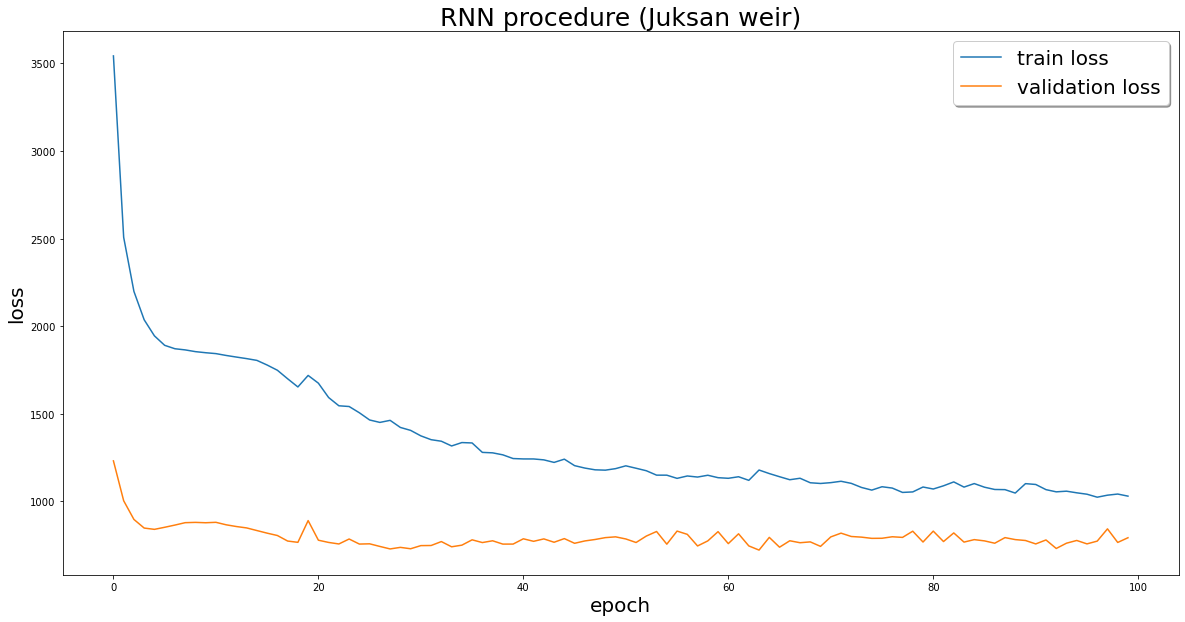

In [317]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), history.history['loss'], label='train loss')
plt.plot(range(100), history.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('RNN procedure (Juksan weir)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('RNN JS_python.png')

# LSTM

In [308]:
# LSTM model (SC)
model = Sequential()
# time_steps는 과거 5개의 데이터를 토대로 미래를 맞춘다.
# features는 Chl-a 하나만 예측하므로 1개이다.
model.add(LSTM(1024, input_shape=(13, 1), return_sequences=False))
model.add(layers.Activation('tanh'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='Adam', metrics=["mean_squared_error","mean_absolute_error"])

history = model.fit(X_train_SC, y_train_SC, validation_split=0.2, epochs=100, verbose=2)

Epoch 1/100
9/9 - 2s - loss: 3793.3906 - mean_squared_error: 3793.3906 - mean_absolute_error: 46.3443 - val_loss: 2200.0220 - val_mean_squared_error: 2200.0220 - val_mean_absolute_error: 35.1439 - 2s/epoch - 216ms/step
Epoch 2/100
9/9 - 1s - loss: 2472.3633 - mean_squared_error: 2472.3633 - mean_absolute_error: 34.8254 - val_loss: 1645.2998 - val_mean_squared_error: 1645.2998 - val_mean_absolute_error: 31.0567 - 965ms/epoch - 107ms/step
Epoch 3/100
9/9 - 1s - loss: 2054.8901 - mean_squared_error: 2054.8901 - mean_absolute_error: 31.4610 - val_loss: 1384.6274 - val_mean_squared_error: 1384.6274 - val_mean_absolute_error: 29.2655 - 979ms/epoch - 109ms/step
Epoch 4/100
9/9 - 1s - loss: 1832.2711 - mean_squared_error: 1832.2711 - mean_absolute_error: 30.0185 - val_loss: 1258.8561 - val_mean_squared_error: 1258.8561 - val_mean_absolute_error: 28.2381 - 993ms/epoch - 110ms/step
Epoch 5/100
9/9 - 1s - loss: 1721.9385 - mean_squared_error: 1721.9385 - mean_absolute_error: 29.4620 - val_loss: 1

Epoch 38/100
9/9 - 1s - loss: 1329.1650 - mean_squared_error: 1329.1650 - mean_absolute_error: 26.9528 - val_loss: 1167.6331 - val_mean_squared_error: 1167.6331 - val_mean_absolute_error: 27.6983 - 944ms/epoch - 105ms/step
Epoch 39/100
9/9 - 1s - loss: 1320.1720 - mean_squared_error: 1320.1720 - mean_absolute_error: 26.8044 - val_loss: 1168.9460 - val_mean_squared_error: 1168.9460 - val_mean_absolute_error: 27.6921 - 955ms/epoch - 106ms/step
Epoch 40/100
9/9 - 1s - loss: 1320.8400 - mean_squared_error: 1320.8400 - mean_absolute_error: 26.8842 - val_loss: 1178.3036 - val_mean_squared_error: 1178.3036 - val_mean_absolute_error: 27.8132 - 979ms/epoch - 109ms/step
Epoch 41/100
9/9 - 1s - loss: 1311.3912 - mean_squared_error: 1311.3912 - mean_absolute_error: 26.8967 - val_loss: 1179.6608 - val_mean_squared_error: 1179.6608 - val_mean_absolute_error: 27.8505 - 948ms/epoch - 105ms/step
Epoch 42/100
9/9 - 1s - loss: 1305.0835 - mean_squared_error: 1305.0835 - mean_absolute_error: 26.6902 - val

Epoch 75/100
9/9 - 1s - loss: 1112.2279 - mean_squared_error: 1112.2279 - mean_absolute_error: 24.9643 - val_loss: 1214.6610 - val_mean_squared_error: 1214.6610 - val_mean_absolute_error: 27.9379 - 972ms/epoch - 108ms/step
Epoch 76/100
9/9 - 1s - loss: 1140.9174 - mean_squared_error: 1140.9174 - mean_absolute_error: 25.6872 - val_loss: 1424.7941 - val_mean_squared_error: 1424.7941 - val_mean_absolute_error: 30.0853 - 991ms/epoch - 110ms/step
Epoch 77/100
9/9 - 1s - loss: 1253.3669 - mean_squared_error: 1253.3669 - mean_absolute_error: 26.9546 - val_loss: 1336.2493 - val_mean_squared_error: 1336.2493 - val_mean_absolute_error: 29.7274 - 960ms/epoch - 107ms/step
Epoch 78/100
9/9 - 1s - loss: 1262.7725 - mean_squared_error: 1262.7725 - mean_absolute_error: 26.3701 - val_loss: 1234.4188 - val_mean_squared_error: 1234.4188 - val_mean_absolute_error: 28.6365 - 960ms/epoch - 107ms/step
Epoch 79/100
9/9 - 1s - loss: 1207.6343 - mean_squared_error: 1207.6343 - mean_absolute_error: 26.0070 - val

In [309]:
model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 1024)              4202496   
                                                                 
 activation_31 (Activation)  (None, 1024)              0         
                                                                 
 dense_49 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 4203521 (16.04 MB)
Trainable params: 4203521 (16.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [310]:
scores = model.evaluate(X_test_SC, y_test_SC)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 9ms/step - loss: 617.6746 - mean_squared_error: 617.6745 - mean_absolute_error: 20.9372
test_loss:  617.674560546875
test_mae:  617.6744995117188


In [311]:
SC_test_y_pred_LSTM = model.predict(X_test_SC)
SC_test_y_pred_LSTM

2/2 [==============================] - 0s 7ms/step


array([[50.108505],
       [48.156857],
       [46.437336],
       [49.8741  ],
       [49.435085],
       [50.17071 ],
       [48.61089 ],
       [52.705063],
       [45.6693  ],
       [51.242596],
       [47.21884 ],
       [56.22313 ],
       [43.830326],
       [44.2043  ],
       [46.67831 ],
       [43.407658],
       [53.36984 ],
       [46.590683],
       [44.203857],
       [41.168728],
       [34.795406],
       [33.30174 ],
       [36.91772 ],
       [31.215897],
       [39.64004 ],
       [55.526367],
       [50.642918],
       [46.0818  ],
       [44.12885 ],
       [38.94306 ],
       [41.720215],
       [43.337345],
       [34.80427 ],
       [30.38955 ],
       [84.32995 ],
       [63.884525],
       [45.7047  ],
       [48.08531 ],
       [45.604877],
       [43.507008],
       [43.140614],
       [44.804302],
       [48.069798],
       [52.68105 ]], dtype=float32)

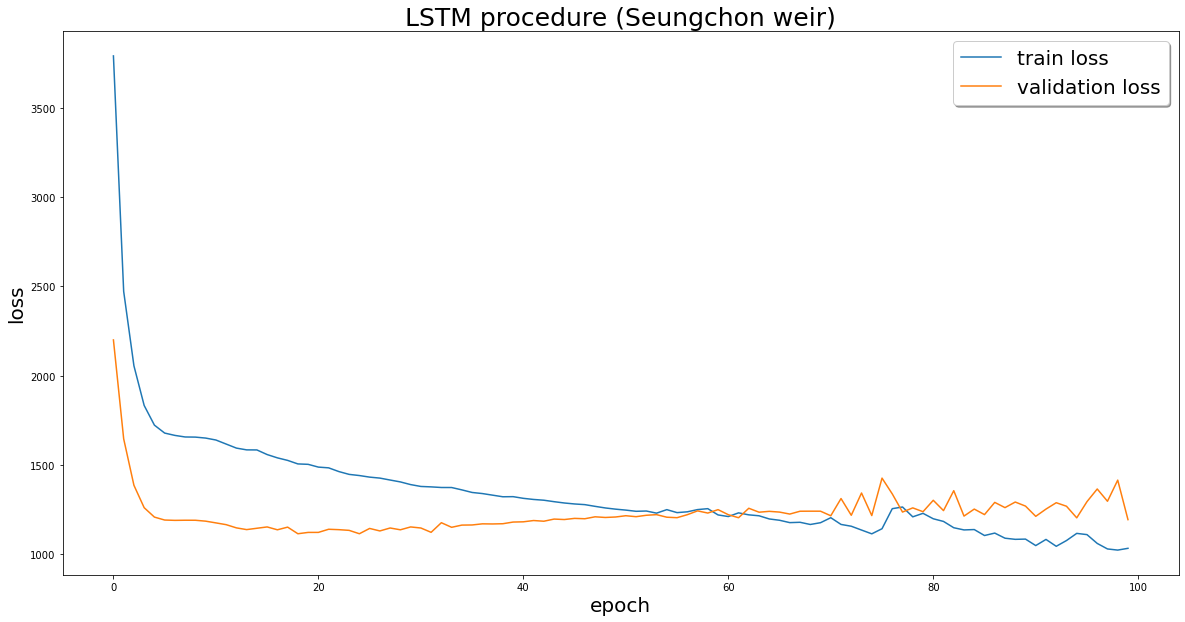

In [312]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), history.history['loss'], label='train loss')
plt.plot(range(100), history.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('LSTM procedure (Seungchon weir)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('LSTM SC_python.png')

In [318]:
# LSTM model (JS)
model = Sequential()
# time_steps는 과거 5개의 데이터를 토대로 미래를 맞춘다.
# features는 Chl-a 하나만 예측하므로 1개이다.
model.add(LSTM(1024, input_shape=(13, 1), return_sequences=False))
model.add(layers.Activation('tanh'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='Adam', metrics=["mean_squared_error","mean_absolute_error"])

history = model.fit(X_train_JS, y_train_JS, validation_split=0.2, epochs=100, verbose=2)

Epoch 1/100
9/9 - 2s - loss: 3425.0071 - mean_squared_error: 3425.0071 - mean_absolute_error: 41.2206 - val_loss: 1281.6317 - val_mean_squared_error: 1281.6317 - val_mean_absolute_error: 25.0593 - 2s/epoch - 218ms/step
Epoch 2/100
9/9 - 1s - loss: 2491.9854 - mean_squared_error: 2491.9854 - mean_absolute_error: 33.1603 - val_loss: 991.9012 - val_mean_squared_error: 991.9012 - val_mean_absolute_error: 21.8199 - 981ms/epoch - 109ms/step
Epoch 3/100
9/9 - 1s - loss: 2178.7493 - mean_squared_error: 2178.7493 - mean_absolute_error: 31.1082 - val_loss: 879.0219 - val_mean_squared_error: 879.0219 - val_mean_absolute_error: 21.3395 - 1s/epoch - 112ms/step
Epoch 4/100
9/9 - 1s - loss: 2000.8837 - mean_squared_error: 2000.8837 - mean_absolute_error: 30.3262 - val_loss: 842.9258 - val_mean_squared_error: 842.9258 - val_mean_absolute_error: 21.7927 - 979ms/epoch - 109ms/step
Epoch 5/100
9/9 - 1s - loss: 1926.3551 - mean_squared_error: 1926.3551 - mean_absolute_error: 30.5611 - val_loss: 843.3939 -

Epoch 39/100
9/9 - 1s - loss: 1160.9338 - mean_squared_error: 1160.9338 - mean_absolute_error: 25.6224 - val_loss: 791.8436 - val_mean_squared_error: 791.8436 - val_mean_absolute_error: 20.6957 - 982ms/epoch - 109ms/step
Epoch 40/100
9/9 - 1s - loss: 1151.3868 - mean_squared_error: 1151.3868 - mean_absolute_error: 25.1628 - val_loss: 831.8882 - val_mean_squared_error: 831.8882 - val_mean_absolute_error: 21.3124 - 978ms/epoch - 109ms/step
Epoch 41/100
9/9 - 1s - loss: 1160.8495 - mean_squared_error: 1160.8495 - mean_absolute_error: 25.2271 - val_loss: 825.6487 - val_mean_squared_error: 825.6487 - val_mean_absolute_error: 21.4990 - 1s/epoch - 113ms/step
Epoch 42/100
9/9 - 1s - loss: 1136.4498 - mean_squared_error: 1136.4498 - mean_absolute_error: 25.1036 - val_loss: 829.2587 - val_mean_squared_error: 829.2587 - val_mean_absolute_error: 21.1509 - 985ms/epoch - 109ms/step
Epoch 43/100
9/9 - 1s - loss: 1103.7972 - mean_squared_error: 1103.7972 - mean_absolute_error: 24.8197 - val_loss: 837.

Epoch 77/100
9/9 - 1s - loss: 787.3007 - mean_squared_error: 787.3007 - mean_absolute_error: 20.5732 - val_loss: 971.1267 - val_mean_squared_error: 971.1267 - val_mean_absolute_error: 22.6594 - 980ms/epoch - 109ms/step
Epoch 78/100
9/9 - 1s - loss: 759.2361 - mean_squared_error: 759.2361 - mean_absolute_error: 20.2994 - val_loss: 974.1774 - val_mean_squared_error: 974.1774 - val_mean_absolute_error: 22.7053 - 984ms/epoch - 109ms/step
Epoch 79/100
9/9 - 1s - loss: 749.1991 - mean_squared_error: 749.1991 - mean_absolute_error: 19.9778 - val_loss: 947.6965 - val_mean_squared_error: 947.6965 - val_mean_absolute_error: 22.3863 - 992ms/epoch - 110ms/step
Epoch 80/100
9/9 - 1s - loss: 743.8041 - mean_squared_error: 743.8041 - mean_absolute_error: 20.0114 - val_loss: 1000.1155 - val_mean_squared_error: 1000.1155 - val_mean_absolute_error: 23.1604 - 999ms/epoch - 111ms/step
Epoch 81/100
9/9 - 1s - loss: 749.7952 - mean_squared_error: 749.7952 - mean_absolute_error: 19.9689 - val_loss: 1011.1530

In [319]:
model.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1024)              4202496   
                                                                 
 activation_33 (Activation)  (None, 1024)              0         
                                                                 
 dense_51 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 4203521 (16.04 MB)
Trainable params: 4203521 (16.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [320]:
scores = model.evaluate(X_test_JS, y_test_JS)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 9ms/step - loss: 516.5380 - mean_squared_error: 516.5380 - mean_absolute_error: 16.3742
test_loss:  516.5380249023438
test_mae:  516.5380249023438


In [321]:
JS_test_y_pred_LSTM = model.predict(X_test_JS)
JS_test_y_pred_LSTM

2/2 [==============================] - 0s 8ms/step


array([[43.609783],
       [67.77292 ],
       [53.71377 ],
       [51.645737],
       [60.709156],
       [43.952904],
       [30.319593],
       [68.535385],
       [63.483944],
       [27.250977],
       [21.826046],
       [21.252253],
       [29.353607],
       [30.022734],
       [25.134148],
       [48.99354 ],
       [31.867085],
       [25.42466 ],
       [45.677963],
       [47.030083],
       [30.0511  ],
       [36.332874],
       [22.150099],
       [27.615116],
       [29.666845],
       [29.666376],
       [28.006033],
       [32.92007 ],
       [27.320736],
       [25.886642],
       [38.750565],
       [42.753357],
       [25.249687],
       [23.198048],
       [34.388794],
       [26.865356],
       [26.279446],
       [27.884861],
       [29.349987],
       [30.229134],
       [30.732634],
       [30.39439 ],
       [30.700798],
       [30.435024]], dtype=float32)

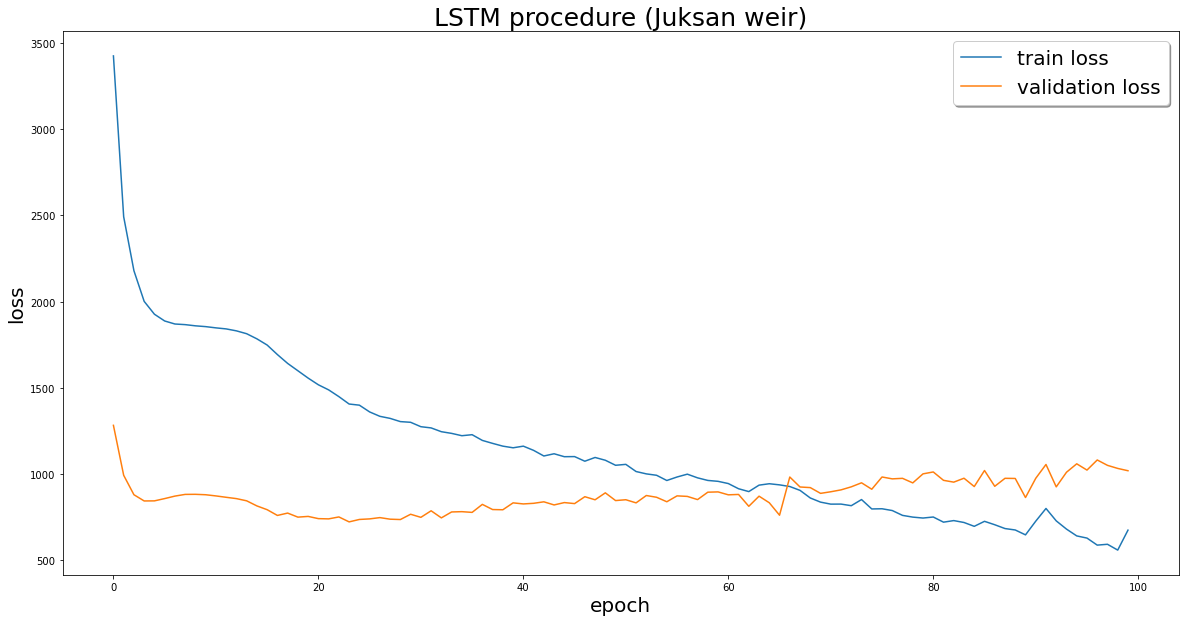

In [322]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), history.history['loss'], label='train loss')
plt.plot(range(100), history.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('LSTM procedure (Juksan weir)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('LSTM JS_python.png')